## Tarea 1  
### Preprocesamiento de datos
##### Luis Enrique López Nerio 1487280
Se utilizara una base de datos tabular que contiene reviews de libros de ciencia de datos vendidos en amazon.


Especificaciones de la versión de python

In [252]:
import sys

print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


#### Librerias

In [283]:

import numpy as np 
import pandas as pd 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string
from nltk.tokenize import word_tokenize
import seaborn as sns
import re
import itertools
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

sns.set()

#### Lectura de la base
La base cuenta con tres columnas: 
| Estrellas | Comentario | URL |
|-----------|------------|-----|

In [284]:

base = pd.read_csv('Reviews.csv',quotechar="\"")

In [285]:
base.head(4)

,stars,comment,book_url
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130


Analisis de las columnas de nuestra base

In [286]:
print('La columna stars puede tomar los valores de: ', sorted(base['stars'].unique()))

La columna stars puede tomar los valores de:  [1.0, 2.0, 3.0, 4.0, 5.0]


In [257]:
print('Se cuentan con ', len(base['book_url']), 'reviews y ', len(base['book_url'].unique()), ' libros diferentes.')

Se cuentan con  20647 reviews y  836  libros diferentes.


Se añade la columna de `base['LongitudComentario']` para contabilizar la longitud del comentario dejado en cada libro 

In [258]:
base['LongitudComentario'] = base['comment'].apply(lambda x: len(str(x).split()))

Se buscan valores nulos

In [259]:

base.isnull().sum()

stars                 0
comment               0
book_url              0
LongitudComentario    0
dtype: int64

Análisis de la longitud de los reviews

[Text(0.5, 0, 'Longitud Comentario en palabras'),
 Text(0, 0.5, 'Cuenta'),
 Text(0.5, 1.0, 'Histograma longitud en palabras de los reviews')]

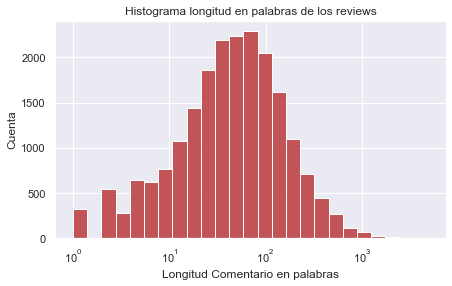

In [260]:
 fig = plt.figure(figsize = (7,4))
ax = sns.histplot(data = base, x= 'LongitudComentario',log_scale=True,bins =25,color='firebrick')
ax.set( xlabel = "Longitud Comentario en palabras", ylabel = "Cuenta",title='Histograma longitud en palabras de los reviews')

#### Preprocesamiento
Se realizara el preprocesamiento para el primer review o comentario paso a paso

In [261]:
comentario = base['comment'].loc[0]
#comentario

Tokenizar(separar en palabras)

In [262]:
#comentario.replace("\'", "")
import re
comentario =  re.sub('[^a-zA-Z]',' ',comentario)
#comentario

In [263]:
palabras = word_tokenize(comentario)
#palabras


Convertir a minusculas

In [264]:
palabras = [palabra.lower() for palabra in palabras ]
#palabras

remover signos de puntuacion

In [265]:

tabla = str.maketrans('', '', string.punctuation)
palabras = [palabra.translate(tabla) for palabra in palabras]
#palabras

Remover stopwords o palabras que no sean alfanumericas

In [266]:
stop_words = set(stopwords.words('english'))
#stop_words

In [267]:
palabras = [palabra for palabra in palabras if palabra.isalpha()]
palabras = [palabra for palabra in palabras if not palabra in stop_words]

Realizar el proceso de "lematización"

In [268]:
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [269]:
palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]

In [270]:
fd = nltk.FreqDist(palabras)
frecuencia = pd.DataFrame(fd.items(), columns=['word', 'frequency'])

In [271]:
frecuencia = frecuencia.sort_values('frequency',ascending=False)
frecuencia = frecuencia.head(20)
#frecuencia

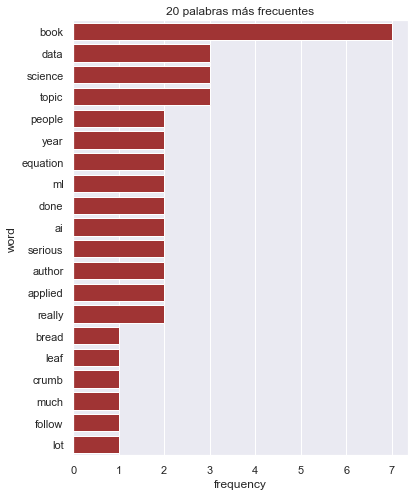

In [272]:
 fig = plt.figure(figsize = (6,8))
 ax = sns.barplot(y='word', x='frequency',data = frecuencia,color="firebrick").set(title='20 palabras más frecuentes')

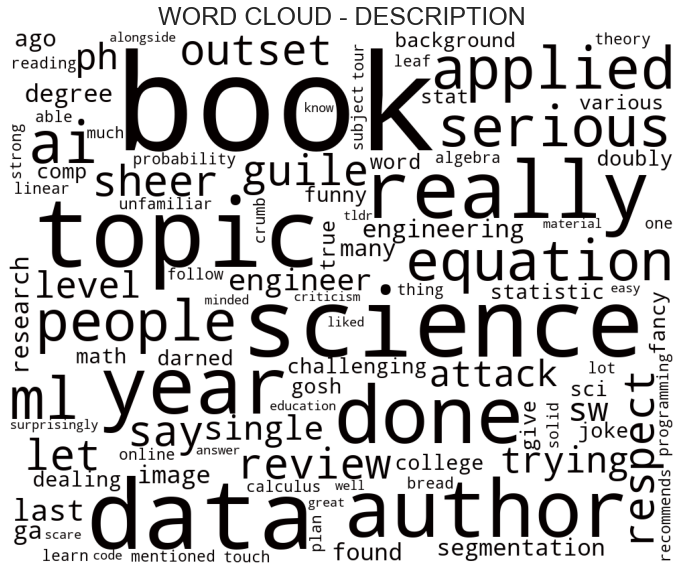

In [273]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#stopwords = set(STOPWORDS)

#newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

#stopwords.update(newStopWords)
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(
    background_color='white',
    #stopwords=stopwords,
    max_words=500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(palabras))
wordcloud.recolor(color_func = black_color_func)

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

### Realizar el preprosemiento para todos los datos
Se realizara el preprocesamiento para todos los reviews de manera conjunta

In [274]:
def preprocesamiento2(comentario):
    comentario =  re.sub('[^a-zA-Z]',' ',comentario)
    palabras = word_tokenize(comentario)
    palabras = [palabra.lower() for palabra in palabras ]
    
    #palabras = [palabra.translate(tabla) for palabra in palabras]
    palabras = [palabra for palabra in palabras if palabra.isalpha()]
    palabras = [palabra for palabra in palabras if not palabra in stop_words]
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    return palabras

In [275]:
base['lematize'] = base['comment'].apply(lambda x:preprocesamiento2(x))
#base['tokens'] = base['comment'].apply(lambda x:preprocesamiento1(x))

In [276]:
base

,stars,comment,book_url,LongitudComentario,lematize
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130,258,"[let, say, outset, review, respect, author, sh..."
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130,196,"[capitalism, best, read, book, nearby, booksto..."
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130,61,"[looking, get, started, data, science, confuse..."
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130,106,"[general, good, book, cover, wide, variety, to..."
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130,151,"[academic, data, scientist, decade, term, coin..."
...,...,...,...,...,...
20642,3.0,This book offers nice information and thoughts...,https://www.amazon.com/dp/0980200482,28,"[book, offer, nice, information, thought, thin..."
20643,5.0,"Am disabled, retired RN, but always wished I w...",https://www.amazon.com/dp/0980200482,26,"[disabled, retired, rn, always, wished, librar..."
20644,3.0,At one point I considered library work as oppo...,https://www.amazon.com/dp/0980200482,84,"[one, point, considered, library, work, oppose..."
20645,5.0,"Overall, I think this is an excellent resource...",https://www.amazon.com/dp/0980200482,89,"[overall, think, excellent, resource, anyone, ..."


In [277]:
texto_total = re.sub('[^a-zA-Z ]',''," ".join(base['lematize'].astype(str)))

In [278]:
lista_palabras_total = []
for fila in base['lematize']:
    for p in fila:
        lista_palabras_total.append(p)

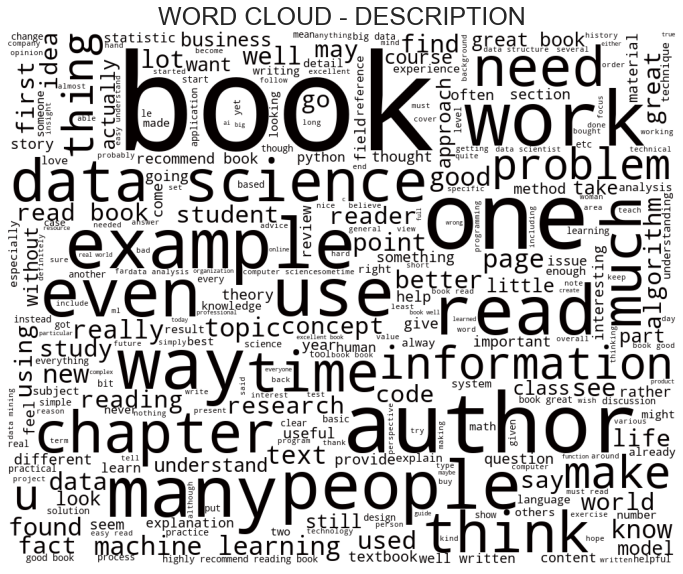

In [279]:


wordcloud = WordCloud(
    background_color='white',
    #stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(texto_total )
wordcloud.recolor(color_func = black_color_func)
print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

In [280]:
fd = nltk.FreqDist(lista_palabras_total)
frecuencia2 = pd.DataFrame(fd.items(), columns=['word', 'frequency'])
frecuencia2 = frecuencia2.sort_values('frequency',ascending=False)
frecuencia2 = frecuencia2.head(30)

In [281]:
frecuencia2

,word,frequency
14,book,35956
43,data,10750
102,read,7484
65,one,5872
188,good,5337
5,author,4997
98,great,4889
105,like,4625
83,well,4392
44,science,4334


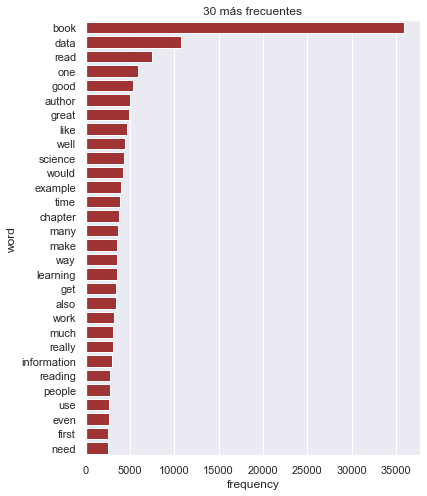

In [282]:
 fig = plt.figure(figsize = (6,8))
 ax = sns.barplot(y='word', x='frequency',data = frecuencia2,color="firebrick").set(title='30 más frecuentes')